In [45]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [46]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [47]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [48]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    n = len(y)
    e = y - np.dot(tx,w)
    return np.dot(np.transpose(e),e)/(2*n)
    #return sum(e)/n
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    raise NotImplementedError

In [49]:
compute_loss(y,tx,np.transpose([2,10]))

2562.8517444050672

# 2 Grid Search

Fill in the function `grid_search()` below:

In [50]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    for tmp1 in range(0,len(w0)):
        for tmp2 in range(0,len(w1)):
            losses[tmp1,tmp2]=compute_loss(y,tx,np.transpose([w0[tmp1],w1[tmp2]]))
    return losses

In [51]:
grid_search(y,tx,np.zeros(2),np.zeros(2))

array([[ 2792.23671276,  2792.23671276],
       [ 2792.23671276,  2792.23671276]])

Let us play with the grid search demo now!

Grid Search: loss*=15.55870336860953, w0*=72.72727272727272, w1*=13.636363636363626, execution time=0.701 seconds
la


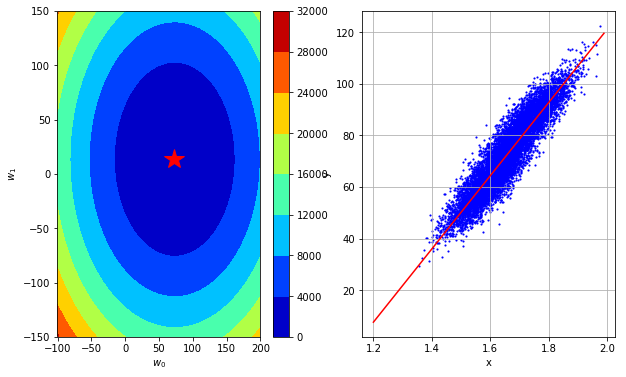

In [52]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
print("la")
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [35]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    # ***************************************************
    e = y - np.dot(tx,w)
    N = len(y)
    #print(tx)
    #print(e)
    #return np.dot(np.transpose(tx),e)/(-N)
    e[e < 0] = -1
    e[e > 0] = 1
    e[(e <= 0) & (e >= 1)] = 0 
    return np.dot(np.transpose(tx),e)/(-N)

In [36]:
compute_gradient(y, tx, np.transpose([75,15]))

array([ 0.2374    ,  0.21033361])

Please fill in the functions `gradient_descent` below:

In [37]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        loss = compute_loss(y, tx, w)
        gradient = compute_gradient(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [38]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.transpose(np.array([0, 0]))

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.236712759166, w0=0.7, w1=-1.846274244599044e-15
Gradient Descent(1/49): loss=2741.1759673576935, w0=1.4, w1=-3.692548489198088e-15
Gradient Descent(2/49): loss=2690.605221956219, w0=2.0999999999999996, w1=-5.538822733797132e-15
Gradient Descent(3/49): loss=2640.5244765547454, w0=2.8, w1=-7.385096978396176e-15
Gradient Descent(4/49): loss=2590.9337311532727, w0=3.5, w1=-9.231371222995221e-15
Gradient Descent(5/49): loss=2541.8329857517997, w0=4.2, w1=-1.1077645467594266e-14
Gradient Descent(6/49): loss=2493.222240350326, w0=4.9, w1=-1.292391971219331e-14
Gradient Descent(7/49): loss=2445.1014949488513, w0=5.6000000000000005, w1=-1.4770193956792355e-14
Gradient Descent(8/49): loss=2397.4707495473785, w0=6.300000000000001, w1=-1.66164682013914e-14
Gradient Descent(9/49): loss=2350.330004145904, w0=7.000000000000001, w1=-1.8462742445990445e-14
Gradient Descent(10/49): loss=2303.6792587444306, w0=7.700000000000001, w1=-2.030901669058949e-14
Gradient Descent

<function __main__.plot_figure>

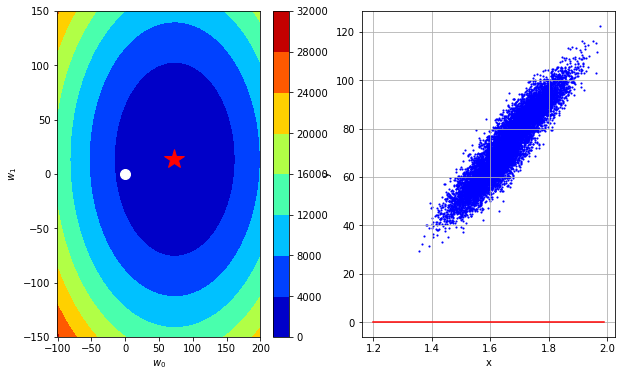

In [39]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 4 Stochastic gradient descent

In [40]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    return compute_gradient(y, tx, w)

def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    losses = []
    w = initial_w
    ws = [initial_w]
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        loss = compute_loss(y, tx, w)
        tmp1,tmp2 = batch_iter(y, tx, 1, num_batches=1, shuffle=True).__next__()
        gradient = compute_stoch_gradient(tmp1,tmp2,w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
        
    return losses, ws

In [41]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.236712759166, w0=0.7, w1=-0.6152734516198444
Gradient Descent(1/49): loss=2749.6589572645453, w0=1.4, w1=-0.5860338700014945
Gradient Descent(2/49): loss=2698.6765078493977, w0=2.0999999999999996, w1=-1.4005976423005388
Gradient Descent(3/49): loss=2660.3849668878897, w0=2.8, w1=-1.4848041508421366
Gradient Descent(4/49): loss=2612.0507858120814, w0=3.5, w1=-0.9300278265079388
Gradient Descent(5/49): loss=2554.8019692887033, w0=4.2, w1=0.08024622396499714
Gradient Descent(6/49): loss=2492.143764055514, w0=4.9, w1=0.8532691128016668
Gradient Descent(7/49): loss=2433.9637067680583, w0=5.6000000000000005, w1=2.2024274066583565
Gradient Descent(8/49): loss=2370.2080046874853, w0=6.300000000000001, w1=3.1875007872653676
Gradient Descent(9/49): loss=2312.4434907816753, w0=7.000000000000001, w1=2.7963690898703044
Gradient Descent(10/49): loss=2269.8948475942784, w0=7.700000000000001, w1=1.110895390717403
Gradient Descent(11/49): loss=2243.1610072152907, w0=8.

<function __main__.plot_figure>

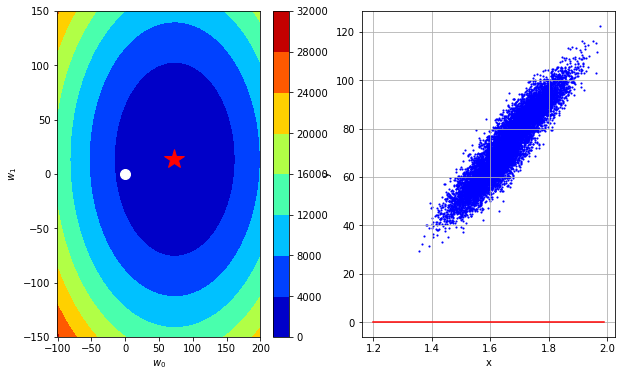

In [42]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

Grid Search: loss*=14.405193928041571, w0*=72.72727272727272, w1*=13.636363636363626, execution time=0.269 seconds


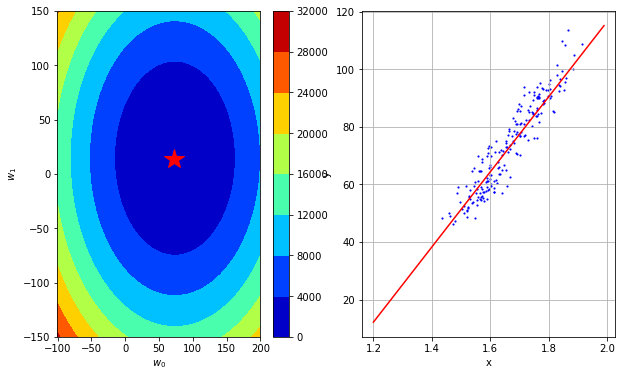

In [43]:
height_new, weight_new, gender_new = load_data(sub_sample=True, add_outlier=False)
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

#loading the datas:
x_new, mean_x_new, std_x_new = standardize(height_new)
y_new, tx_new = build_model_data(x_new, weight_new)
# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y_new, tx_new, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x_new, std_x_new, height_new, weight_new)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

<function __main__.plot_figure>

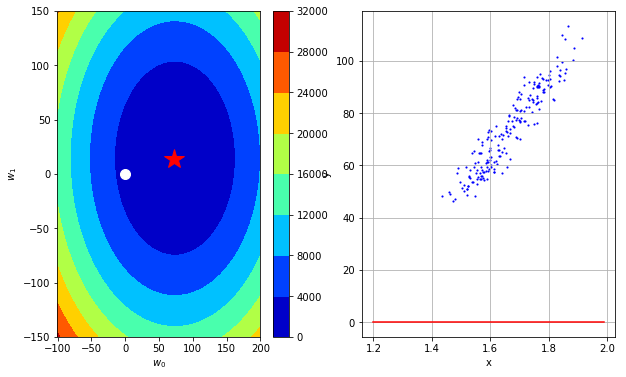

In [44]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x_new, std_x_new, height_new, weight_new, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)